## How well does a negative binomial approximate a _downsampled_ negative binomial?

By matching the first two moments, we find:

$$\sum_{r'=0}^\infty \text{Bin}(r|r', \kappa)\,\text{NB}(r'|\mu, \Phi) \approx \text{NB}(r|\kappa\mu, \Phi)$$

In other words, we claim that a downsampled negative binomial distribution with original parameters $(\mu,\Phi)$ is approximately another negative binomial distribution with parameters $(\kappa\mu,\Phi)$ where $0 \leq \kappa \leq 1$ is the downsampling rate. Crucially, the overdispersion parameter remains conserved during downsampling.

Here, we would like to test the quality of this approximation.

In [1]:
%matplotlib inline

import os
import matplotlib.pylab as plt
from pyro_extras import *
from pyro.distributions import Binomial

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [6]:
mu = 5.0
phi = 0.1
n_samples = 100_0
kappa_list = [0.9, 0.7, 0.5, 0.3, 0.1]

data = NegativeBinomial(mu, phi).sample(sample_shape=[n_samples])
downsampled_data_list = [Binomial(total_count=data, probs=kappa).sample() for kappa in kappa_list]
downsampled_data_list = [data] + downsampled_data_list
kappa_list = [1.0] + kappa_list

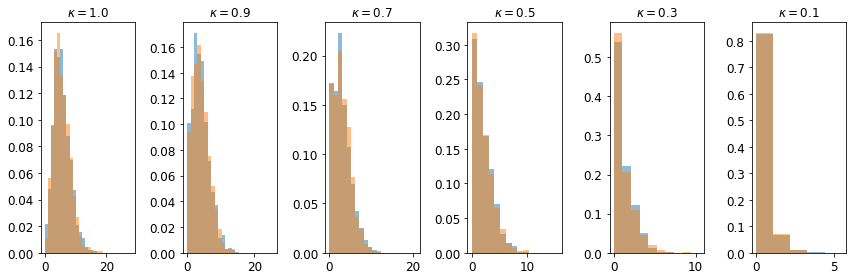

In [7]:
fig, axs = plt.subplots(ncols=len(kappa_list), figsize=(12, 4))

for ax, data, kappa in zip(axs, downsampled_data_list, kappa_list):
    max_counts = 5*kappa*mu + 2

    # histogram of genuiely downsampled negative binomial
    _ = ax.hist(data.numpy(), range=(0, max_counts + 1), bins=int(max_counts) + 1, density=True, alpha=0.5)
    
    # histrogram of NB approximation to the downsampled distribution
    approx_data = NegativeBinomial(kappa*mu, phi).sample(sample_shape=[n_samples])
    _ = ax.hist(approx_data.numpy(), range=(0, max_counts + 1), bins=int(max_counts) + 1, density=True, alpha=0.5)
    ax.set_title('$\\kappa=' + str(kappa) + '$')
plt.tight_layout()